### Guiding questions for this notebook:

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
%matplotlib inline
import datetime as dt

In [35]:
data = pd.read_csv('featured_data.csv')
df = data.copy()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Month,Order_Hour,Order_Day,Sale_Value,Buyer_State,Buyer_City,Product_Simplified,Product_Brand_Simplified
0,295665,Macbook Pro Laptop,1.0,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,0,30,1700.00,NY,New York City,Computer,Apple
1,295666,LG Washing Machine,1.0,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,7,29,600.00,NY,New York City,NaN,LG
2,295667,USB-C Charging Cable,1.0,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,18,12,11.95,NY,New York City,Cable,NaN
3,295668,27in FHD Monitor,1.0,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,15,22,149.99,CA,San Francisco,Monitor,NaN
4,295669,USB-C Charging Cable,1.0,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,12,18,11.95,GA,Atlanta,Cable,NaN


In [36]:
df.dtypes

Order ID                      int64
Product                      object
Quantity Ordered            float64
Price Each                  float64
Order Date                   object
Purchase Address             object
Order_Month                   int64
Order_Hour                    int64
Order_Day                     int64
Sale_Value                  float64
Buyer_State                  object
Buyer_City                   object
Product_Simplified           object
Product_Brand_Simplified     object
dtype: object

## What was the best month for sales? How much was earned that month?

In [58]:
monthly_sales_values = []

for x in range(1,13):
    table = df.loc[df['Order_Month'] == x]
    monthly_sales_values.append(table['Sale_Value'].sum())

In [82]:
monthly_sales = pd.DataFrame()
monthly_sales['Month'] = pd.date_range(start='2020-01', freq='M', periods=12).month_name()
monthly_sales['Total Sales ($)'] = monthly_sales_values
monthly_sales.sort_values(by=['Total Sales ($)'])

,Month,Total Sales ($)
0,January,1822256.73
8,September,2097560.13
1,February,2202022.42
7,August,2244467.88
5,June,2577802.26
6,July,2647775.76
2,March,2807100.38
4,May,3152606.75
10,November,3199603.20
3,April,3390670.24


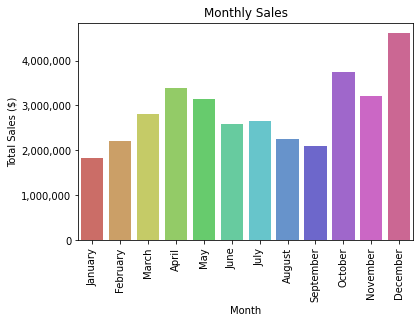

In [77]:
chart = sns.barplot(x="Month", y="Total Sales ($)", data=monthly_sales, palette = 'hls')
chart.set_title('Monthly Sales')
plt.ticklabel_format(style='plain', axis='y')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))